In [1]:
from image_mapping import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
%%time
test_mapper = ImageMapper()



CPU times: user 2.06 s, sys: 674 ms, total: 2.73 s
Wall time: 2.7 s


In [3]:
%%time
test_pix_valsV = [[i] for i in range(500)] #first 0 is for padding, then 499 pix vals
test_pix_valsV = np.array(test_pix_valsV)
test_imV = test_mapper.map_image(test_pix_valsV, 'VTS')

CPU times: user 53.6 ms, sys: 3.57 ms, total: 57.1 ms
Wall time: 62.5 ms


/anaconda3/envs/ctlearn/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


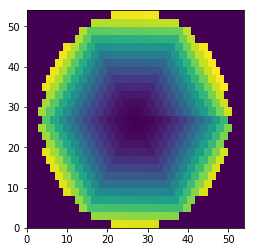

In [4]:
plt.pcolor(test_imV[:,:,0])
plt.axes().set_aspect('equal')

In [5]:
%%time
test_pix_valS = [[i] for i in range(11329)] #first 0 is for padding, then 499 pix vals
test_pix_valS = np.array(test_pix_valS)
test_imS = test_mapper.map_image(test_pix_valS, 'MSTS')

CPU times: user 9.71 ms, sys: 1.5 ms, total: 11.2 ms
Wall time: 12 ms


/anaconda3/envs/ctlearn/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


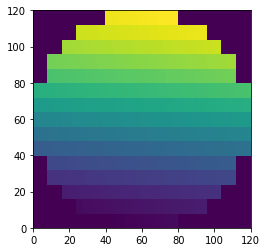

In [6]:
plt.pcolor(test_imS[:,:, 0])
plt.axes().set_aspect('equal')


In [7]:
test_pix_vals = {}
test_im_dict = {}
#for tel_ in ['LST', 'MSTN', 'SST1', 'MSTF', 'SSTC', 'SSTA']:
for tel_ in ['LST', 'MSTN', 'SST1', 'MSTF', 'MSTS', 'SSTC', 'SSTA', 'VTS', 'MGC']:
    print(tel_)
    %%time
    test_pix_vals[tel_] = [[i] for i in range(test_mapper.num_pixels[tel_]+1)]
    test_pix_vals[tel_] = np.array(test_pix_vals[tel_])
    test_im_dict[tel_] = test_mapper.map_image(test_pix_vals[tel_],tel_)

LST
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
MSTN
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs
SST1
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 11 µs
MSTF
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11 µs
MSTS
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs
SSTC
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11.2 µs
SSTA
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs
VTS
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 12.2 µs
MGC
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 11.2 µs


LST


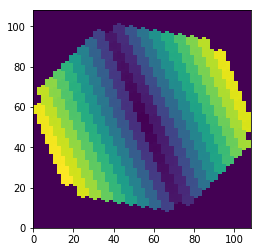

MSTN


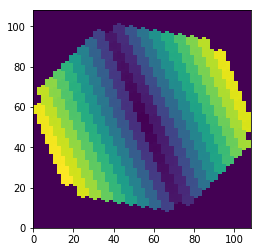

SST1


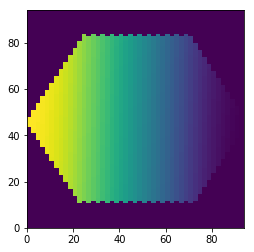

MSTF


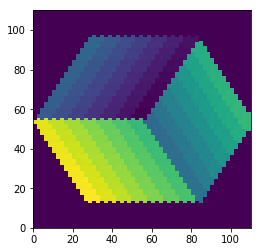

MSTS


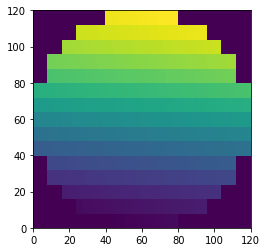

SSTC


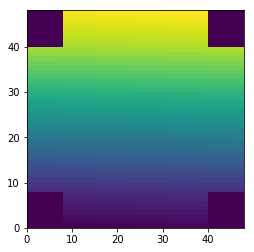

SSTA


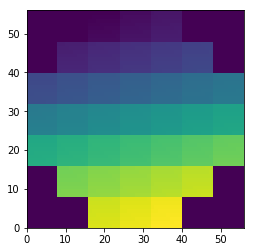

VTS


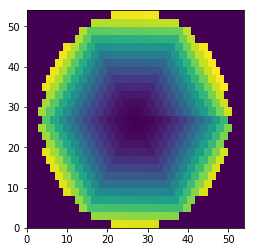

MGC


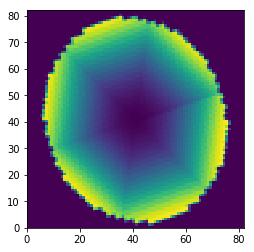

In [8]:
for tel_ in ['LST', 'MSTN', 'SST1', 'MSTF', 'MSTS', 'SSTC', 'SSTA', 'VTS', 'MGC']:
    print(tel_)
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(test_im_dict[tel_][:,:,0],cmap='viridis')
    plt.savefig("{}_mapped.pdf".format(tel_))
    plt.show()




In [9]:
%%time
test_mapper_pad = ImageMapper(padding = {
                    'MSTS': 10,
                    'VTS': 10,
                    'MSTF': 10,
                    'MSTN': 20,
                    'LST': 10,
                    'SST1': 10,
                    'SSTC': 10,
                    'SSTA': 10,
                    'MGC': 10
                    })



CPU times: user 3.02 s, sys: 1.08 s, total: 4.09 s
Wall time: 4.19 s


In [10]:
test_im_dict_pad = {}
#for tel_ in ['LST', 'MSTN', 'SST1', 'MSTF', 'SSTC', 'SSTA']:
for tel_ in ['LST', 'MSTN', 'SST1', 'MSTF', 'MSTS', 'SSTC', 'SSTA', 'VTS', 'MGC']:
    print(tel_)
    %%time
    test_im_dict_pad[tel_] = test_mapper_pad.map_image(test_pix_vals[tel_],tel_)

LST
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 11.9 µs
MSTN
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
SST1
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs
MSTF
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
MSTS
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11 µs
SSTC
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
SSTA
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
VTS
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
MGC
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


LST


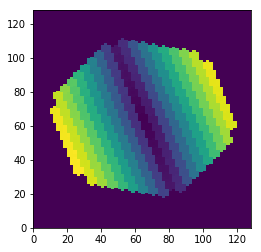

MSTN


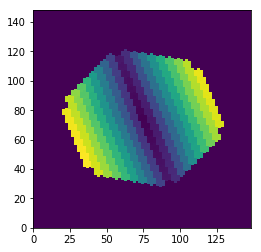

SST1


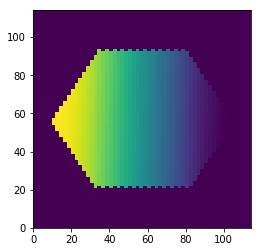

MSTF


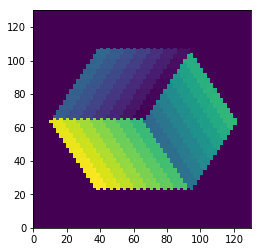

MSTS


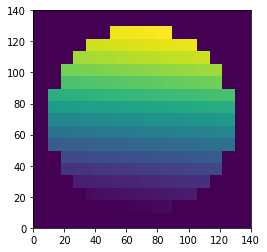

SSTC


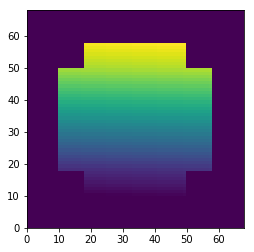

SSTA


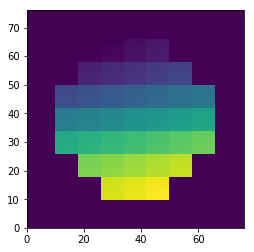

VTS


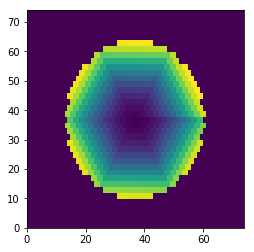

MGC


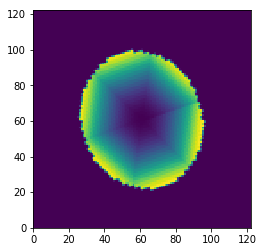

In [11]:
for tel_ in ['LST', 'MSTN', 'SST1', 'MSTF', 'MSTS', 'SSTC', 'SSTA', 'VTS', 'MGC']:
    print(tel_)
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(test_im_dict_pad[tel_][:,:,0],cmap='viridis')
    plt.savefig("{}_mapped.pdf".format(tel_))
    plt.show()



